Wholesale customers Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

In [2]:
def median(lst):
    return np.median(np.array(lts))

In [3]:
df = pd.read_csv('Wholesale customers data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
y_column = "Milk"
y = df[y_column]

X = df.drop(columns=[y_column, 'Channel', 'Region'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X , y,test_size = 0.25,train_size =0.75)

In [7]:
rs = np.linspace(0,5,num=5)
acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []

for i in rs:
    i = int(i)
    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Random: {}; accuracy: {}".format(i, acc))
    acc_p.append(acc)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "Perceptron with normalization: ", acc
    acc_pn.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(20, ), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlp.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(130, 130, 130), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlpn.append(acc)

Random: 0; accuracy: 0.0
Random: 1; accuracy: 0.011363636363636364
Random: 2; accuracy: 0.0
Random: 3; accuracy: 0.0
Random: 5; accuracy: 0.0


In [8]:
print("Perceptron: ", min(acc_p), np.median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), np.median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), np.median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), np.median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

Perceptron:  0.0 0.0 0.011363636363636364 0.004545454545454545
Perceptron with Norm:  0.011363636363636364 0.022727272727272728 0.045454545454545456 0.013252163397375684
MLP:  0.011363636363636364 0.011363636363636364 0.022727272727272728 0.005567022142689042
MLP with Norm:  0.11363636363636363 0.13636363636363635 0.13636363636363635 0.009090909090909087


In [9]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 2000,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=2000)

In [11]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.72


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         337       0.00      0.00      0.00         1
         489       0.00      0.00      0.00         1
         540       0.00      0.00      0.00         0
         640       1.00      1.00      1.00         1
         659       0.00      0.00      0.00         0
         735       1.00      1.00      1.00         1
         780       0.00      0.00      0.00         0
         793       0.00      0.00      0.00         0
         829       1.00      1.00      1.00         1
         865       1.00      1.00      1.00         1
         873       1.00      1.00      1.00         1
         926       0.00      0.00      0.00         1
         944       0.00      0.00      0.00         0
         961       1.00      1.00      1.00         1
        1110       1.00      1.00      1.00         1
        1115       1.00      1.00      1.00         1
        1124       1.00      1.00      1.00         1
        1175       1.00    

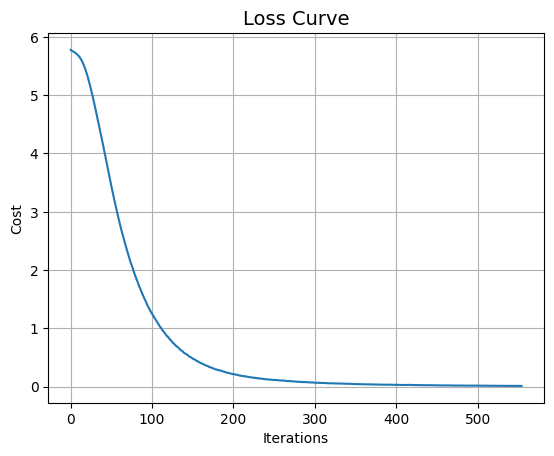

In [13]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [14]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

In [15]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=2)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'lbfgs'}


In [16]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.72
